<a href="https://colab.research.google.com/github/sylviatobing/geospatial/blob/main/creating_and_joining_geodataframesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)

In [4]:
school_districts = gpd.read_file('school_districts.geojson')

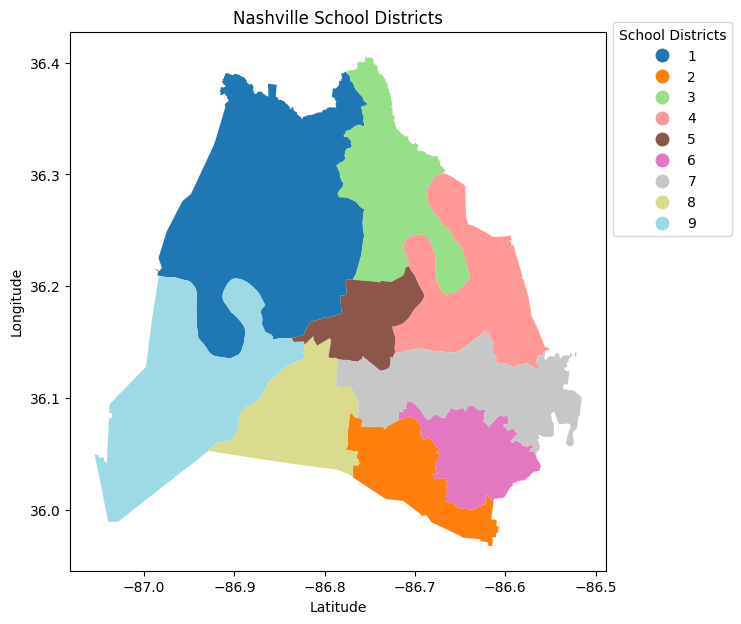

In [5]:
# set legend style
lgnd_kwds = {'title': 'School Districts', 'loc': 'upper left',
             'bbox_to_anchor': (1, 1.03), 'ncol':1}

# Plot the school districts using the tab20 colormap (qualitative)
school_districts.plot(column='district', cmap='tab20', legend=True, legend_kwds=lgnd_kwds, figsize=(7,7));
plt.xlabel('Latitude');
plt.ylabel('Longitude');
plt.title('Nashville School Districts');

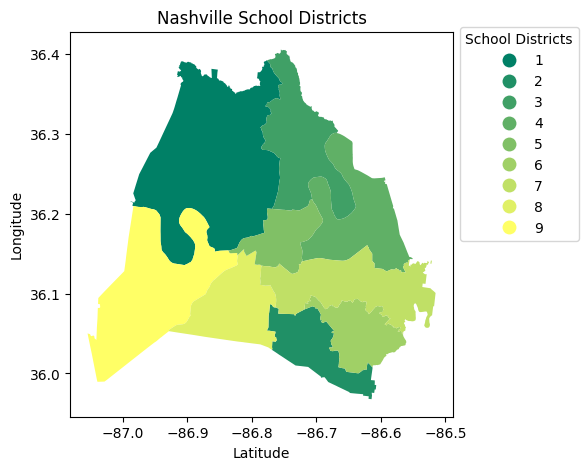

In [6]:
# Plot the school districts using the summer colormap (sequential)
school_districts.plot(column='district', cmap='summer', legend=True, legend_kwds=lgnd_kwds);
plt.xlabel('Latitude');
plt.ylabel('Longitude');
plt.title('Nashville School Districts');

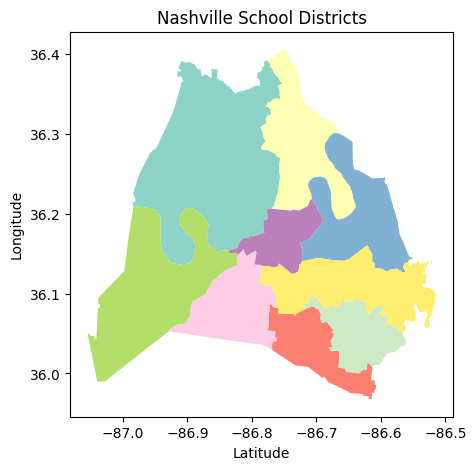

In [7]:
# Plot the school districts using the Set3 colormap without the column argument
school_districts.plot(cmap='Set3', legend=True, legend_kwds=lgnd_kwds);
plt.xlabel('Latitude');
plt.ylabel('Longitude');
plt.title('Nashville School Districts');

                   name                                           geometry
0  Historic Buena Vista  MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ...
1        Charlotte Park  MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ...
2              Hillwood  MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ...
3            West Meade  MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ...
4          White Bridge  MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ...


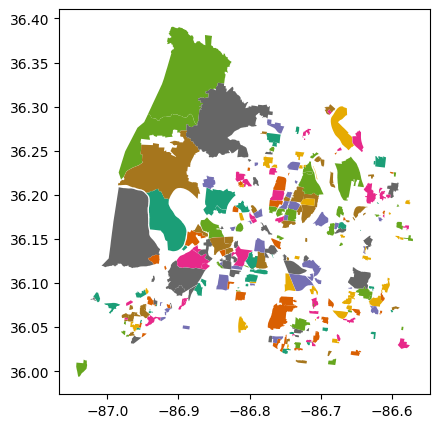

In [9]:
# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file('neighborhoods.geojson')

# Print the first few rows of neighborhoods
print(neighborhoods.head())

# Plot the neighborhoods, color according to name and use the Dark2 colormap
neighborhoods.plot(column='name', cmap='Dark2');

In [10]:
# Print the first row of school districts GeoDataFrame and the crs
print(school_districts.head(1))
print(school_districts.crs)

# Convert the crs to epsg:3857
school_districts.geometry = school_districts.geometry.to_crs(epsg=3857)

# Print the first row of school districts GeoDataFrame and the crs
print(school_districts.head(1))
print(school_districts.crs)

   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  
0  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...  
EPSG:4326
   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  
0  MULTIPOLYGON (((-9659344.056 4353528.767, -965...  
EPSG:3857


In [11]:
art = gpd.read_file('public_art.csv')

In [12]:
from shapely.geometry import Point

# Print tthe first few rows of the art DataFrame
print(art.head())

# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs=neighborhoods.crs, geometry=art.geometry)
print(type(art_geo))

                             Title                                 Last Name  \
0          [Cross Country Runners]                                     Frost   
1  [Fourth and Commerce Sculpture]                                    Walker   
2              12th & Porter Mural                                   Kennedy   
3                A Splash of Color  Stevenson and Stanley and ROFF (Harroff)   
4             A Story of Nashville                                    Ridley   

                  First Name                           Location  \
0                      Miley     4001 Harding Rd., Nashville TN   
1                        Lin  333 Commerce Street, Nashville TN   
2                        Kim                  114 12th Avenue N   
3  Doug and Ronnica and Lynn                   616 17th Ave. N.   
4                       Greg    615 Church Street, Nashville TN   

                                              Medium       Type  \
0                                             Bro

In [13]:
# Spatially join art_geo and neighborhoods
art_intersect_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op='intersects')

# Print the shape property of art_intersect_neighborhoods
print(art_intersect_neighborhoods.shape)

(40, 13)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [14]:
# Create art_within_neighborhoods by spatially joining art_geo and neighborhoods
art_within_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'within')

# Print the shape property of art_within_neighborhoods
print(art_within_neighborhoods.shape)

(40, 13)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [15]:
# Spatially join art_geo and neighborhoods and using the contains op
art_containing_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'contains')

# Print the shape property of art_containing_neighborhoods
print(art_containing_neighborhoods.shape)


(0, 13)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [16]:
# Spartially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op='within')

# Print the first few rows
print(neighborhood_art.head())

                                Title Last Name First Name  \
1     [Fourth and Commerce Sculpture]    Walker        Lin   
4                A Story of Nashville    Ridley       Greg   
21                        Chet Atkins     Faxon    Russell   
22  Children's Chairs For The Seasons    McGraw     Deloss   
34                    Foliated Scroll   Bloomer       Kent   

                                             Location  \
1                   333 Commerce Street, Nashville TN   
4                     615 Church Street, Nashville TN   
21  Corner of Fifth Avenue North and Union Street,...   
22                    615 Church Street, Nashville TN   
34                    615 Church Street, Nashville TN   

                                         Medium       Type  \
1                                                Sculpture   
4                      Hammered copper repousse     Frieze   
21  Bronze stool and guitar on a granite plynth  Sculpture   
22                 Mixed Media - woo

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [18]:
# Get name and title from neighborhood_art and group by name
neighborhood_art_grouped = neighborhood_art[['name', 'Title']].groupby('name')

# Aggregate the grouped data and count the artworks within each polygon
print(neighborhood_art_grouped.agg('count').sort_values(by='Title', ascending=False))

                          Title
name                           
Urban Residents              22
Lockeland Springs             3
Edgehill (ONE)                2
Germantown                    2
Hillsboro-West End            2
Inglewood                     2
Sunnyside                     2
Chestnut Hill (TAG)           1
Historic Edgefield            1
McFerrin Park                 1
Renraw                        1
Wedgewood Houston (SNAP)      1


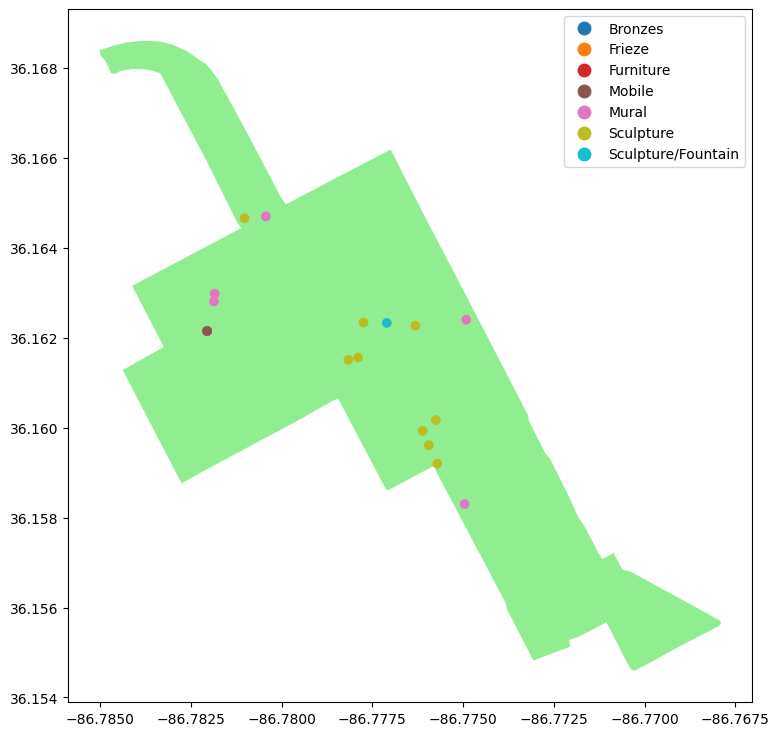

In [19]:
# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == 'Urban Residents']

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

# Plot the urban_polygon as ax
ax = urban_polygon.plot(color = 'lightgreen', figsize=(9, 9))

# Add a plot of the urban_art and show it
urban_art.plot( ax = ax, column = 'Type', legend = True);